In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score

## DATA IMPORT AND CLEANING

In [3]:
%cd /content/drive/My Drive/Colab Notebooks/DataViz

/content/drive/My Drive/Colab Notebooks/DataViz


In [4]:
file_path = '/content/drive/My Drive/Colab Notebooks/DataViz/data.csv'

data = pd.read_csv(file_path)

In [5]:
print(data["Call_Flag"].value_counts())
data.head()

Call_Flag
0    125322
1      4764
Name: count, dtype: int64


,DATE_FOR,RTD_ST_CD,CustomerSegment,Tenure,Age,MART_STATUS,GENDER,CHANNEL1_6M,CHANNEL2_6M,CHANNEL3_6M,...,CHANNEL5_3M,METHOD1_3M,PAYMENTS_3M,NOT_DI_3M,NOT_DI_6M,EVENT1_30_FLAG,EVENT2_90_SUM,LOGINS,POLICYPURCHASECHANNEL,Call_Flag
0,5/19/2014,ST_S0,1,16.175222,78.403833,MS_S0,F,0.0,0.0,1.0,...,2,0,3,0,0,0,0,0,0,0
1,5/17/2014,ST_S0,1,15.931554,70.989733,MS_S1,F,0.0,6.0,0.0,...,0,3,3,0,0,0,0,0,0,0
2,5/15/2014,ST_S0,1,15.937029,87.578371,MS_S2,M,0.0,0.0,10.0,...,0,0,6,0,0,0,0,0,0,0
3,5/16/2014,ST_S1,1,15.934292,68.438056,MS_S2,M,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0
4,5/20/2014,ST_S0,1,15.501711,80.514716,MS_S0,F,0.0,0.0,1.0,...,0,0,1,0,0,0,0,0,0,0


In [6]:
# COLUMNS DROPPED AND WHY
data = data.drop("EVENT1_30_FLAG", axis=1) #ALL VALUES WERE 0
data = data.drop("DATE_FOR", axis = 1) #ONLY 5 DATES THAT DONT REALLY SEEM TO SAY MUCH

In [7]:
def missing_data_details(dataframe):
    total = dataframe.isnull().sum().sort_values(ascending=False)
    percent = (dataframe.isnull().sum() / dataframe.isnull().count() * 100).sort_values(ascending=False)
    return pd.concat([total, percent], axis=1, keys=['Total Missing', 'Percent'])

detailed_report = missing_data_details(data)
print("Detailed missing values report:\n", detailed_report)

Detailed missing values report:
                        Total Missing   Percent
PAYMENTS_6M                      809  0.621896
CHANNEL2_6M                      809  0.621896
RECENT_PAYMENT                   809  0.621896
METHOD1_6M                       809  0.621896
CHANNEL5_6M                      809  0.621896
CHANNEL4_6M                      809  0.621896
CHANNEL3_6M                      809  0.621896
CHANNEL1_6M                      809  0.621896
CHANNEL4_3M                        0  0.000000
NOT_DI_6M                          0  0.000000
EVENT2_90_SUM                      0  0.000000
LOGINS                             0  0.000000
POLICYPURCHASECHANNEL              0  0.000000
NOT_DI_3M                          0  0.000000
PAYMENTS_3M                        0  0.000000
METHOD1_3M                         0  0.000000
CHANNEL5_3M                        0  0.000000
RTD_ST_CD                          0  0.000000
CHANNEL3_3M                        0  0.000000
CHANNEL2_3M                

# Feature Selection

In [8]:
features = ['DATE_FOR', 'RTD_ST_CD', 'CustomerSegment', 'Tenure', 'Age',
       'MART_STATUS', 'GENDER', 'CHANNEL1_6M', 'CHANNEL2_6M', 'CHANNEL3_6M',
       'CHANNEL4_6M', 'CHANNEL5_6M', 'METHOD1_6M', 'RECENT_PAYMENT',
       'PAYMENTS_6M', 'CHANNEL1_3M', 'CHANNEL2_3M', 'CHANNEL3_3M',
       'CHANNEL4_3M', 'CHANNEL5_3M', 'METHOD1_3M', 'PAYMENTS_3M', 'NOT_DI_3M',
       'NOT_DI_6M', 'EVENT2_90_SUM', 'LOGINS', 'POLICYPURCHASECHANNEL']

temporal_features = ["DATE_FOR"]

continuous_features = ['Tenure', 'Age']

discrete_features = ['CHANNEL1_6M', 'CHANNEL2_6M', 'CHANNEL3_6M',
       'CHANNEL4_6M', 'CHANNEL5_6M', 'METHOD1_6M',
       'PAYMENTS_6M', 'CHANNEL1_3M', 'CHANNEL2_3M', 'CHANNEL3_3M',
       'CHANNEL4_3M', 'CHANNEL5_3M', 'METHOD1_3M', 'PAYMENTS_3M', 'LOGINS']

# USE ONEHOTENCODER ON GENDER
binary_features = ["POLICYPURCHASECHANNEL","NOT_DI_3M","NOT_DI_6M", "RECENT_PAYMENT"]

categorical_features = ["RTD_ST_CD", "CustomerSegment", "MART_STATUS", "EVENT2_90_SUM", "GENDER"]

features = temporal_features + continuous_features + discrete_features + binary_features + categorical_features

data_NAdrop = data.dropna()
X = data_NAdrop.drop("Call_Flag", axis=1)
y = data_NAdrop["Call_Flag"]

# SCALES ALL CONTINUOUS FEATURES

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X[continuous_features] = scaler.fit_transform(X[continuous_features])

"""
# ONEHOT ENCODES ALL CATEGORICAL FEATURES
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X[categorical_features])
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_features))
X = X.drop(categorical_features, axis=1)
X = pd.concat([X.reset_index(drop=True), X_encoded_df], axis=1)
"""

# LABEL ENCODES FEATURES

for feature in categorical_features:
    le = LabelEncoder()
    X[feature] = le.fit_transform(X[feature])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(y_test.value_counts())
print(y_train.value_counts())

Call_Flag
0    31139
1     1181
Name: count, dtype: int64
Call_Flag
0    93413
1     3544
Name: count, dtype: int64


In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score

# RandomForest Classifier
clf1 = DecisionTreeClassifier(random_state=42)
clf1.fit(X_train, y_train)  # Training
y_pred = clf1.predict(X_test)  # Predicting

# Evaluating the Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Classification Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Classification Accuracy: 0.9356
Precision: 0.1828
Recall: 0.2193
F1 Score: 0.1994


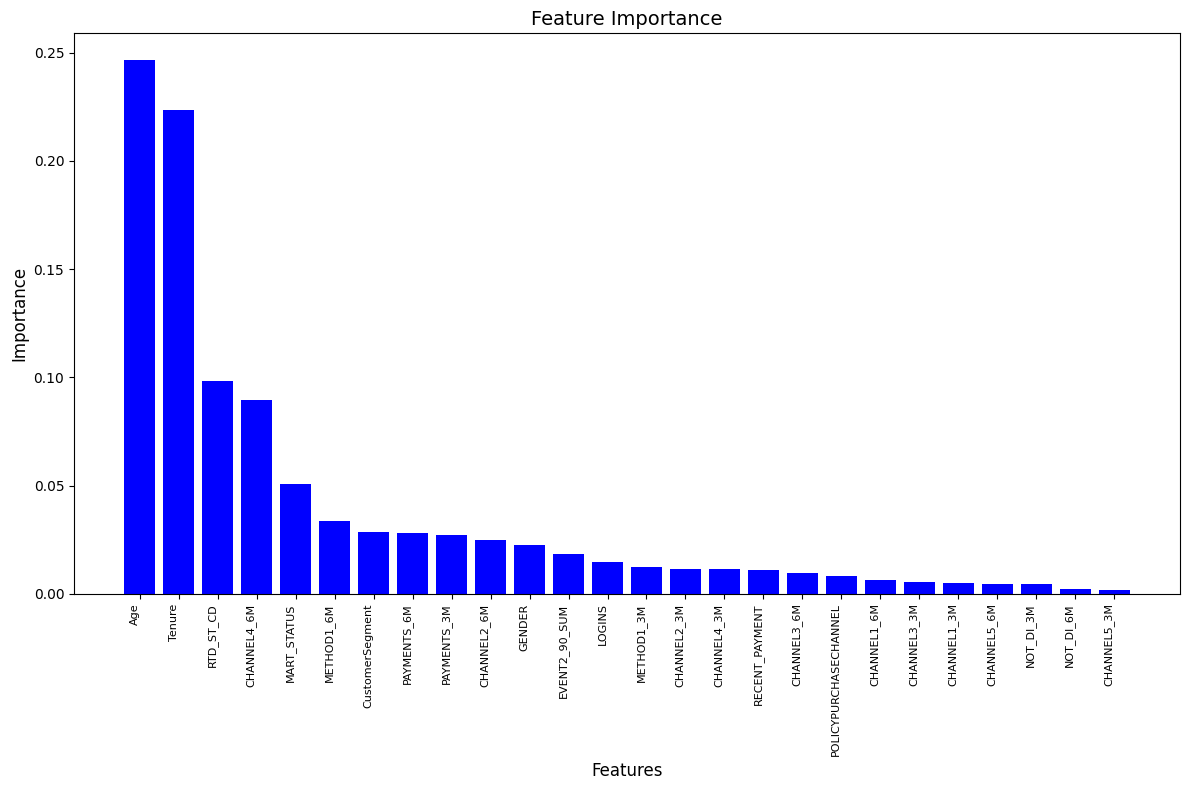

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

importances = clf1.feature_importances_

feature_df = pd.DataFrame({'Feature Name': X_train.columns, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))  # Increase figure size for better readability
bars = plt.bar(feature_df['Feature Name'], feature_df['Importance'], color='b')
plt.xlabel('Features', fontsize=12)  # Increase font size for axis labels
plt.ylabel('Importance', fontsize=12)  # Increase font size for axis labels
plt.title('Feature Importance', fontsize=14)  # Increase font size for title
plt.xticks(rotation=90, ha='right', fontsize=8)  # Rotate x-axis labels for better readability and reduce font size
plt.tight_layout()  # Adjust layout for better spacing

plt.show()

# Model Training and Class Adjustment

## Class Adjustment

In [11]:
important_features = ['RTD_ST_CD', 'Tenure', 'Age', 'CHANNEL4_6M', 'PAYMENTS_6M', 'CHANNEL4_3M', 'LOGINS']
continuous_features = ['Tenure', 'Age']
categorical_features = ['RTD_ST_CD']

data_NAdrop = data.dropna()
X = data_NAdrop.drop("Call_Flag", axis=1)
y = data_NAdrop["Call_Flag"]

# SCALES ALL CONTINUOUS FEATURES
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X[continuous_features] = scaler.fit_transform(X[continuous_features])

X_important = X[important_features]

encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X_important[['RTD_ST_CD']])
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_features))
X_important = X_important.drop(categorical_features, axis=1)
X_important = pd.concat([X_important.reset_index(drop=True), X_encoded_df], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_important, y, test_size=0.25, random_state=42)

## Imbalanced Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score

# RandomForest Classifier
clf1 = RandomForestClassifier(n_estimators=100, random_state=42, bootstrap = True)
clf1.fit(X_train, y_train)  # Training
y_pred = clf1.predict(X_test)  # Predicting

# Evaluating the Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Classification Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

imbalanced_accuracy = accuracy
imbalanced_precision = precision
imbalanced_recall = recall
imbalanced_f1 = f1

Classification Accuracy: 0.9621
Precision: 0.3981
Recall: 0.0728
F1 Score: 0.1231


## Undersampled Random Forest

In [13]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

X_random, y_random = rus.fit_resample(X_train, y_train)
print(y_random.value_counts())

Call_Flag
0    3544
1    3544
Name: count, dtype: int64


In [14]:
# RANDOM UNDERSAMPLE MODEL
random_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_model.fit(X_random, y_random)  # Training
y_pred = random_model.predict(X_test)  # Predicting

# Evaluating the Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Classification Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

random_accuracy = accuracy
random_precision = precision
random_recall = recall
random_f1 = f1

Classification Accuracy: 0.7474
Precision: 0.0997
Recall: 0.7358
F1 Score: 0.1755


## Oversampled Random Forest

In [15]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

X_smote, y_smote = smote.fit_resample(X_train, y_train)

print(y_smote.value_counts())

Call_Flag
0    93413
1    93413
Name: count, dtype: int64


In [16]:
# SMOTE MODEL
smote_model = RandomForestClassifier(n_estimators=100, random_state=42)
smote_model.fit(X_smote, y_smote)  # Training
y_pred = smote_model.predict(X_test)  # Predicting

# Evaluating the Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Classification Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

smote_recall = recall
smote_accuracy = accuracy
smote_precision = precision
smote_f1 = f1

Classification Accuracy: 0.9139
Precision: 0.1423
Recall: 0.2701
F1 Score: 0.1864


## Logistic Regression Model
Uses Oversampled Numeric Data

In [17]:
important_features = ['Tenure', 'Age', 'CHANNEL4_6M', 'PAYMENTS_6M', 'CHANNEL4_3M', 'LOGINS']

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

model = LogisticRegression()
model.fit(X_smote[important_features], y_smote)

y_pred = model.predict(X_test[important_features])

# Evaluating the Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Classification Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

log_accuracy = accuracy
log_precision = precision
log_recall = recall
log_f1 = f1

Classification Accuracy: 0.7835
Precision: 0.1120
Recall: 0.7113
F1 Score: 0.1936


# EVALUATION

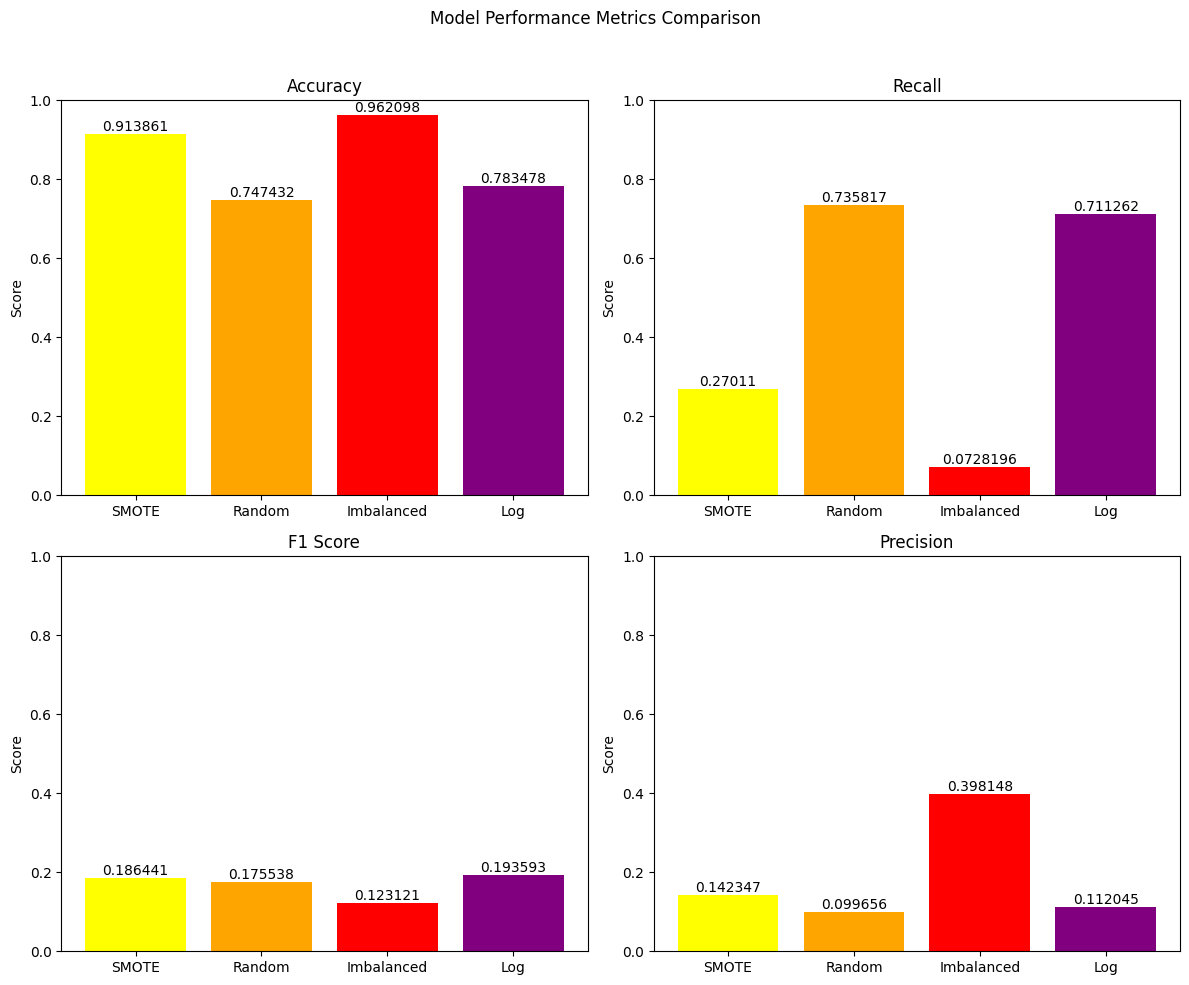

In [20]:
import matplotlib.pyplot as plt

# Sample data for each metric
accuracy_scores = [smote_accuracy, random_accuracy, imbalanced_accuracy, log_accuracy]
recall_scores = [smote_recall, random_recall, imbalanced_recall, log_recall]
f1_scores = [smote_f1, random_f1, imbalanced_f1, log_f1]
precision_scores = [smote_precision, random_precision, imbalanced_precision, log_precision]

# Labels for the bars
labels = ['SMOTE', 'Random', 'Imbalanced', 'Log']

# Setting up the plot space - 2x2 grid of plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Model Performance Metrics Comparison')

# Plot for accuracy
axes[0, 0].bar(labels, accuracy_scores, color=['yellow', 'orange', 'red', 'purple'])
axes[0, 0].set_title('Accuracy')
axes[0, 0].set_ylim(0, 1)
axes[0, 0].set_ylabel('Score')

# Plot for recall
axes[0, 1].bar(labels, recall_scores, color=['yellow', 'orange', 'red', 'purple'])
axes[0, 1].set_title('Recall')
axes[0, 1].set_ylim(0, 1)
axes[0, 1].set_ylabel('Score')

# Plot for F1 score
axes[1, 0].bar(labels, f1_scores, color=['yellow', 'orange', 'red', 'purple'])
axes[1, 0].set_title('F1 Score')
axes[1, 0].set_ylim(0, 1)
axes[1, 0].set_ylabel('Score')

# Plot for precision
axes[1, 1].bar(labels, precision_scores, color=['yellow', 'orange', 'red', 'purple'])
axes[1, 1].set_title('Precision')
axes[1, 1].set_ylim(0, 1)
axes[1, 1].set_ylabel('Score')

# Display value labels on top of each bar
for ax in axes.flat:
    for container in ax.containers:
        ax.bar_label(container, label_type='edge')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()
